<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/5%EC%A3%BC%EC%B0%A8/%EB%89%B4%EC%9A%95%EC%97%90%EC%84%9C_%EB%B0%A9%EC%9D%B4_%EB%91%98_%EB%94%B8%EB%A6%B0_%EC%A7%91%EC%9D%84_%EC%97%90%EC%96%B4%EB%B9%84%EC%97%94%EB%B9%84%EC%97%90_%EB%82%B4%EB%86%93%EC%9C%BC%EB%A0%A4_%ED%95%9C%EB%8B%A4%2C_%EC%9D%B4_%EB%95%8C_%EC%A0%81%EB%8B%B9%ED%95%9C_%EC%88%99%EB%B0%95%EB%A3%8C%EB%A5%BC_%EA%B5%AC%ED%95%98%EC%8B%9C%EC%98%A4(%EB%AC%B8%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오. (5점)
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득



## Step 0. Regression에 대하여

### 선형 회귀에 대하여

### 그 외의 회귀 방법


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']='b06d525a9f66198051ccb648b091778a'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'



  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.6MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv("AB_NYC_2019.csv")

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [6]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   last_review                     38843 non-null  object 
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 4.1+ MB


### 문제 5. 수치형 데이터와 Price의 Jointplot 분석하기


In [11]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

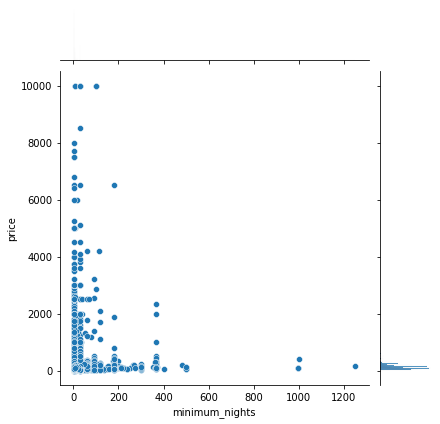

In [12]:
sns.jointplot(data=df,x="minimum_nights",y="price")


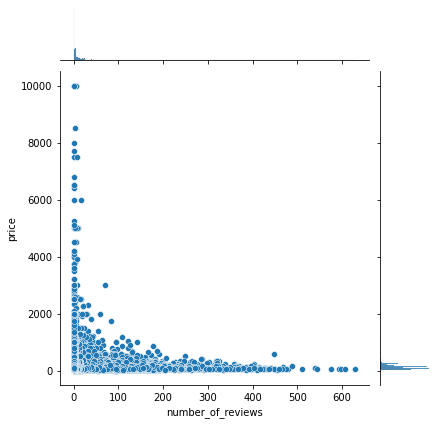

In [13]:
sns.jointplot(data=df,x="number_of_reviews",y="price")

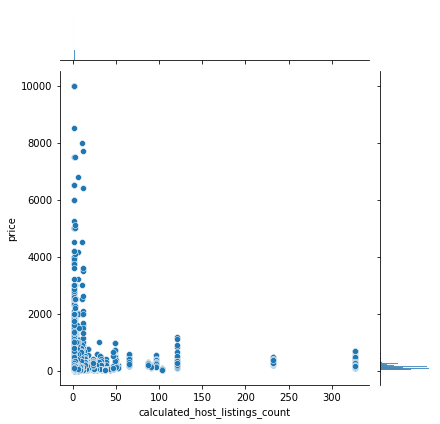

In [14]:
sns.jointplot(data=df,x="calculated_host_listings_count",y="price")


### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

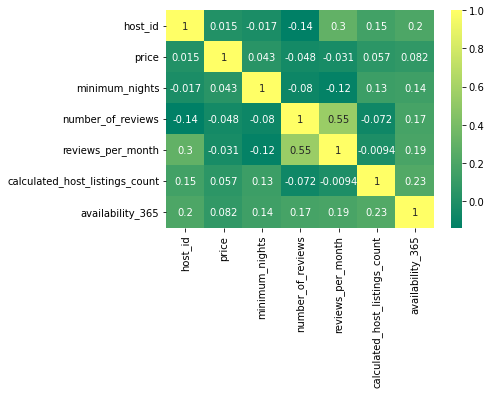

In [15]:
sns.heatmap(df.corr(),cmap='summer',annot=True)


### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   last_review                     38843 non-null  object 
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 4.1+ MB


In [17]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Richmondtown             1
Name: neighbourhood, Length: 221, dtype: int64

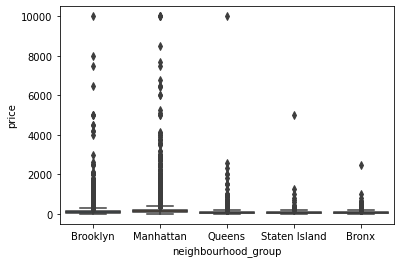

In [18]:
sns.boxplot(data=df,x="neighbourhood_group",y='price')

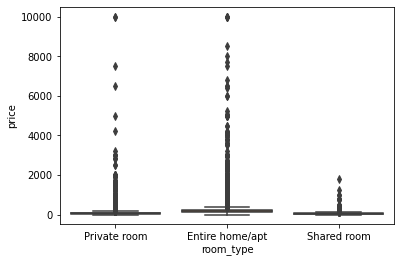

In [19]:
sns.boxplot(data=df,x="room_type",y='price')

## Step 3. 데이터 클리닝 수행하기

### 문제 8. 미기입, 오기입 데이터 확인하기

In [20]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인
df.isna().sum()





host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [22]:
df['last_review']=df.last_review.apply(pd.to_datetime)

In [23]:
df['last_review_year']=df.last_review.apply(lambda x:x.year)
df['last_review_month']=df.last_review.apply(lambda x:x.month)
df['last_review_day']=df.last_review.apply(lambda x:x.day)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0
2,4632,Manhattan,Harlem,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN,NaN
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0


In [24]:
df.isna().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
last_review_year                  10052
last_review_month                 10052
last_review_day                   10052
dtype: int64

In [25]:
df.drop('last_review',axis=1,inplace=True)

In [26]:
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
df['last_review_year']=df['last_review_year'].fillna(0)
df['last_review_month']=df['last_review_month'].fillna(0)
df['last_review_day']=df['last_review_day'].fillna(0)

In [27]:
df=df.astype({'last_review_month':'int','last_review_year':'int','last_review_day':'int'})

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  last_review_year                48895 non-null  int64  
 11  last_review_month               48895 non-null  int64  
 12  last_review_day                 

### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

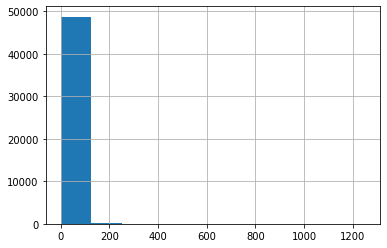

In [29]:
df['minimum_nights'].hist()

In [30]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기

mn = df['minimum_nights'].quantile(0.98)
print(mn)




30.0


In [31]:
df = df[df['minimum_nights'] < mn]

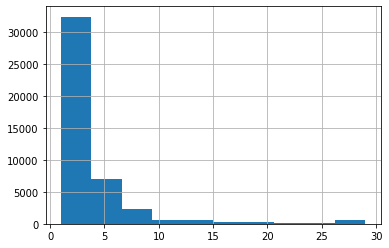

In [32]:
df['minimum_nights'].hist()

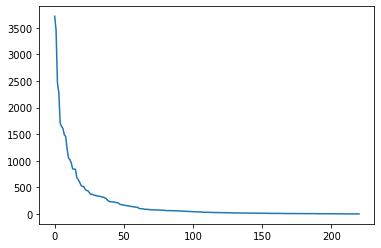

In [45]:
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)), neigh)

In [47]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s: s if str(s) not in neigh[50:] else 'others')

In [53]:
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x: 'No' if x is True else 'Yes')

In [56]:
df['last_review_year'].value_counts()

2019    23729
0        8285
2018     5309
2017     2934
2016     2554
2015     1331
2014      179
2013       39
2012       21
2011        7
Name: last_review_year, dtype: int64

In [89]:
print(df['price'].quantile(0.95))
print(df['price'].quantile(0.005))

350.0
26.0


In [90]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1, p2)

350.0 26.0


In [91]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

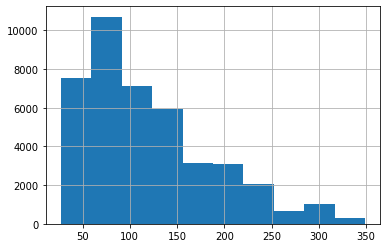

In [92]:
df['price'].hist()

### 문제 10. 미기입 데이터 처리하기

In [33]:
# fill(), dropna() 등으로 미기입된 데이터를 처리하기





## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리

In [58]:
df.columns


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_review_year', 'last_review_month', 'last_review_day',
       'review_exists'],
      dtype='object')

In [93]:
X_cat=df[['neighbourhood_group', 'neighbourhood', 'room_type','review_exists']]
X_cat = pd.get_dummies(X_cat,drop_first=True)

In [94]:
X_cat

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Private room,room_type_Shared room
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48891,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48892,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48893,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,review_exists
0,2787,Brooklyn,others,Private room,149,1,9,0.21,6,365,2018,10,19,Yes
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,2019,5,21,Yes
2,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365,0,0,0,Yes
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,2019,7,5,Yes
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,2018,11,19,Yes


In [101]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df[['host_id',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_review_year', 'last_review_month', 'last_review_day']]

scaler.fit(X_num)
X_scaled=scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [102]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Private room,room_type_Shared room
0,-0.848373,-0.587189,-0.353916,-0.589632,0.064974,2.133280,0.465430,1.504411,0.561194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,-0.848373,-0.587189,0.416072,-0.487172,-0.084610,2.053297,0.466724,-0.024124,0.746522,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.848350,-0.119574,-0.546413,-0.716201,-0.122006,2.133280,-2.146825,-1.552659,-1.199420,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.848347,-0.587189,5.228499,2.080372,-0.122006,0.765580,0.466724,0.587290,-0.736100,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.848317,1.517076,-0.353916,-0.655930,-0.122006,-0.786078,0.465430,1.810118,0.561194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 문제 13. 학습데이터와 테스트데이터 분리하기


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [105]:
from xgboost import XGBRegressor

In [106]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train,y_train)





[13:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 15. 모델 학습 결과 평가하기

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [108]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))


33.62205564444074
46.355960836990704


## LinearRegression

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [110]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

In [111]:
print('MSE :{0:.3f},RMSE :{1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE :2167.232,RMSE :46.554
Variance score : 0.527


In [112]:
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 133.2579138618441
회귀 계수 값: [  0.5  -6.2  -2.3  -1.6   0.6  10.1  -4.1   1.6  -0.6  19.4  67.7   8.4
  -0.6 -13.2 -15.6  11.7   4.4 -26.3   7.7 -11.3  -7.9 -14.9 -23.9 -41.7
 -30.  -13.3  -3.5  -4.9 -23.8  -8.4  16.6  14.1  -7.8   9.9   8.6 -48.5
  -1.3 -67.  -11.4 -10.9 -19.3  11.4 -19.2   6.4 -45.1  -3.7  -1.1  18.9
  10.2 -21.2 -10.4   1.4  14.9  -8.3 -14.8  -3.4 -25.6 -18.2 -63.5  11.3
  16.5  -4.1 -10.6 -75.2 -98.8]


In [113]:
coeff=pd.Series(data=np.round(lr.coef_,1),index=X.columns)
coeff.sort_values(ascending=False)

neighbourhood_group_Manhattan       67.7
neighbourhood_group_Brooklyn        19.4
neighbourhood_Park Slope            18.9
neighbourhood_Fort Greene           16.6
neighbourhood_Williamsburg          16.5
                                    ... 
neighbourhood_Harlem               -48.5
neighbourhood_Washington Heights   -63.5
neighbourhood_Inwood               -67.0
room_type_Private room             -75.2
room_type_Shared room              -98.8
Length: 65, dtype: float64

In [114]:
from sklearn.model_selection import cross_val_score

neg_mse_scores=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores',np.round(neg_mse_scores,2))
print( '5 folds 의 개별 RMSE scores :',np.round(rmse_scores,2))
print(' 5 folds 의 평균 RMSE :{0:3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores [-2265.41 -2092.96 -2094.56 -2247.39 -2557.07]
5 folds 의 개별 RMSE scores : [47.6  45.75 45.77 47.41 50.57]
 5 folds 의 평균 RMSE :47.417121


## 릿지

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 수행
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X,y,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print("5folds의 개별 Negative MSE score : ",np.round(neg_mse_scores,3))
print("5 folds의 개별 RMSE scores:",np.round(rmse_scores,3))
print("5 folds의 평균 RMSE:{0:.3f}".format(avg_rmse))

5folds의 개별 Negative MSE score :  [-2266.811 -2091.101 -2094.221 -2245.521 -2558.407]
5 folds의 개별 RMSE scores: [47.611 45.729 45.763 47.387 50.581]
5 folds의 평균 RMSE:47.414


## 결정트리, GBM,XGBoost,LightGBM의 회귀

In [122]:
def get_model_cv_prediction(model,X,y):
  nep_mse_scores=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print('####',model.__class__.__name__,'####')
  print('5 교차 검증의 평균 RMSE:{0:.3f}'.format(avg_rmse))

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=300)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=300)
xgb_reg=XGBRegressor(n_estimators=300)
lgbm_reg=LGBMRegressor(n_estimators=300)

#트리기반의 회귀 모델을 반복하면서 평가 수행
models=[dt_reg,rf_reg,gb_reg,xgb_reg,lgbm_reg]
for model in models:
  get_model_cv_prediction(model,X,y)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE:47.414
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE:47.414
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE:47.414
[13:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#### XGBRegressor ####
5 교차 검증의 평균 RMSE:47.414
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE:47.414


[13:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


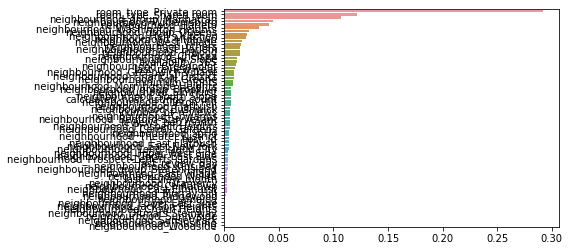

In [126]:
xgb_reg=XGBRegressor(n_estimators=300)

#앞 예제에서 만들어진 X_data,y_target 데이터 세트를 적용해 학습
xgb_reg.fit(X_train,y_train)



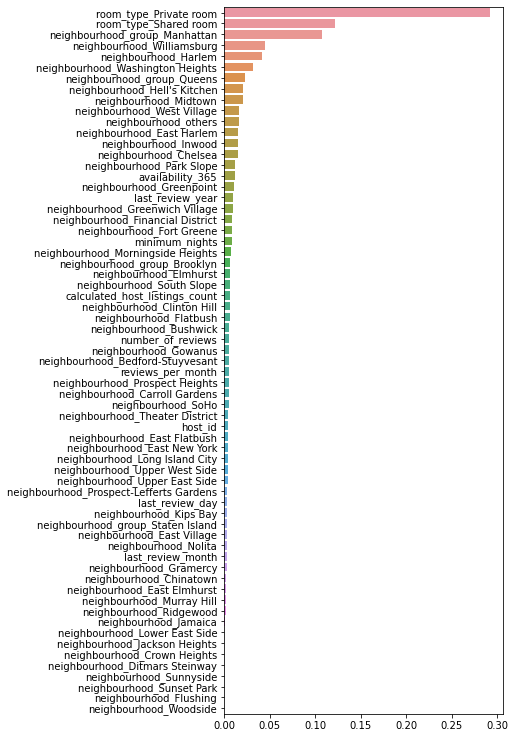

In [128]:


feature_series=pd.Series(data=xgb_reg.feature_importances_,index=X_train.columns)
feature_series=feature_series.sort_values(ascending=False)
plt.figure(figsize=(5,13))
sns.barplot(x=feature_series,y=feature_series.index)

## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


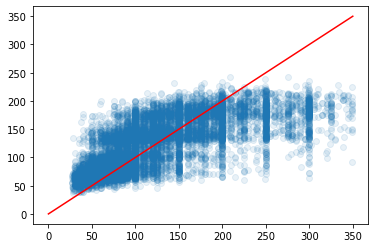

In [116]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')





### 문제 17. 에러 값의 히스토그램 확인하기


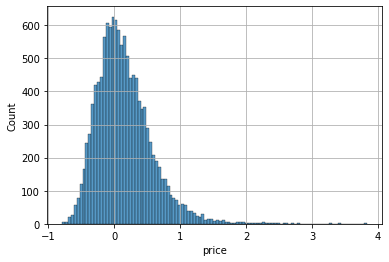

In [117]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()





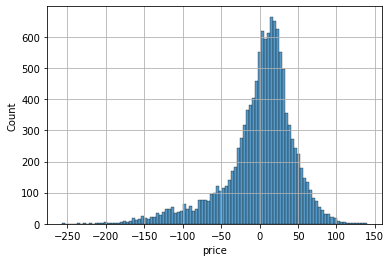

In [118]:
err = pred - y_test
sns.histplot(err)
plt.grid()